In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [22]:
# Load training data (one patient at a time)
num_folds = 5

X_test = pd.read_csv('normal_vs_disease_test_data.csv')
y_test = pd.read_csv('normal_vs_disease_test_label.csv')
y_test = np.array(y_test.drop(columns=['Unnamed: 0']))

X_train = pd.read_csv('normal_vs_disease_training_data.csv')
y_train = pd.read_csv('normal_vs_disease_training_label.csv')
y_train = np.array(y_train.drop(columns=['Unnamed: 0']))


    
top_gene=[]
with open ("intersection_mild_severe_and_normal_rest.txt") as f1:
    lines=f1.readlines()
    for line in lines:
        line=line.strip()
        top_gene.append(line)
        
index = X_train.columns.get_indexer(top_gene)  # find index of the top n features in the dataset

X_train_new = X_train.iloc[:, index] # retain only the top n features in the data
X_test_new = X_test.iloc[:, index] # retain only the top n features in the data

### Cell-level classification of normal and COVID using SVM

In [44]:
temp=[]
C=[1, 0.9, 0.8, 0.7, 0.6, 0.5]
kernel=['linear', 'poly', 'rbf', 'sigmoid']

parameter_svm_intersection_normal_covid=[]
performance_svm_intersection_normal_covid=[]

for temp_i in range(0, len(kernel)):
    for temp_i2 in range(0, len(C)):
        print(temp_i)
        print(temp_i2)
        clf_select = SVC(kernel=kernel[temp_i], class_weight='balanced', C=C[temp_i2])
        clf_select.fit(X_train_new, y_train)  # train the model using cross validation training set (9 patients)

        test_pred = clf_select.predict(X_test_new)  # predict using cross validation testing set 
        f1_select = f1_score(y_test, test_pred, average='weighted')
        
        parameter_svm_intersection_normal_covid.append((kernel[temp_i], C[temp_i2]))
        temp.append(f1_select)
    performance_svm_intersection_normal_covid.append(temp)
    temp=[]

print(parameter_svm_intersection_normal_covid)
print(performance_svm_intersection_normal_covid)


0
0
0
1
0
2
0
3
0
4
0
5
1
0
1
1
1
2
1
3
1
4
1
5
2
0
2
1
2
2
2
3
2
4
2
5
3
0
3
1
3
2
3
3
3
4
3
5
[('linear', 1), ('linear', 0.9), ('linear', 0.8), ('linear', 0.7), ('linear', 0.6), ('linear', 0.5), ('poly', 1), ('poly', 0.9), ('poly', 0.8), ('poly', 0.7), ('poly', 0.6), ('poly', 0.5), ('rbf', 1), ('rbf', 0.9), ('rbf', 0.8), ('rbf', 0.7), ('rbf', 0.6), ('rbf', 0.5), ('sigmoid', 1), ('sigmoid', 0.9), ('sigmoid', 0.8), ('sigmoid', 0.7), ('sigmoid', 0.6), ('sigmoid', 0.5)]
[[0.7651220869398628, 0.7647729431004204, 0.7642516519242282, 0.7633832540370934, 0.7618262811972114, 0.7590744787667458], [0.8452640410546779, 0.8458293345816484, 0.8454777481154722, 0.8440714022507664, 0.8429704428241492, 0.8396453535850178], [0.8575702737873756, 0.8579302993977113, 0.8556558237176295, 0.8554979243745847, 0.8547663219694162, 0.85270561373448], [0.5002591469921952, 0.5002623049307768, 0.5002607854418479, 0.5007788876341406, 0.5006071894684367, 0.5006071894684367]]


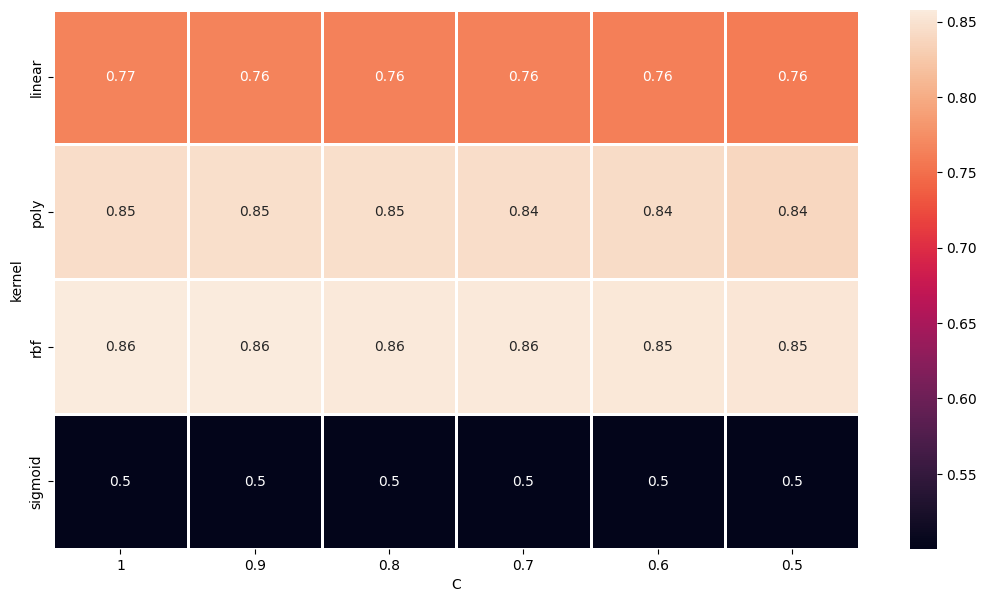

In [58]:
fig, ax = plt.subplots(figsize=(13,7))

# Set the font size and the distance of the title from the plot
ttl = ax.title
ttl.set_position([0.5,1.05])


x_axis_labels = [1,0.9,0.8,0.7,0.6,0.5] # labels for x-axis
y_axis_labels = ['linear', 'poly', 'rbf', 'sigmoid'] # labels for y-axis

heat_map = sns.heatmap(performance_svm_intersection_normal_covid, linewidth = 1 , annot = True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('C')
plt.ylabel('kernel')
plt.show()

### Cell-level classification of normal and COVID using random forest

In [23]:
temp_rf=[]
num_tree=[100, 150, 200, 250, 300, 350]
loss=["gini", "entropy", "log_loss"]

performance_rf_intersection_normal_covid=[]

for temp_i3 in range(0, len(num_tree)):
    for temp_i4 in range(0, len(loss)):
        print(temp_i3)
        print(temp_i4)
        clf_rf = RandomForestClassifier(n_estimators = num_tree[temp_i3], criterion = loss[temp_i4])
        clf_rf.fit(X_train_new, y_train)
        test_pred_rf = clf_rf.predict(X_test_new)
        f1_rf = f1_score(y_test, test_pred_rf, average='weighted')
        temp_rf.append(f1_rf)
    performance_rf_intersection_normal_covid.append(temp_rf)
    temp_rf=[]

print(performance_rf_intersection_normal_covid)

0
0
0
1
0
2
1
0
1
1
1
2
2
0
2
1
2
2
3
0
3
1
3
2
4
0
4
1
4
2
5
0
5
1
5
2
[[0.8905212416013633, 0.8887698145055354, 0.8880607594199842], [0.8896078814961258, 0.8912117614636956, 0.8903744836442199], [0.8880041722033977, 0.8890261299577993, 0.8907655323095579], [0.8907866772418226, 0.8895299427128306, 0.888589533255562], [0.8918439428171989, 0.8893304311074981, 0.8914113143864564], [0.889962470621062, 0.8912336671009923, 0.8901895103051617]]


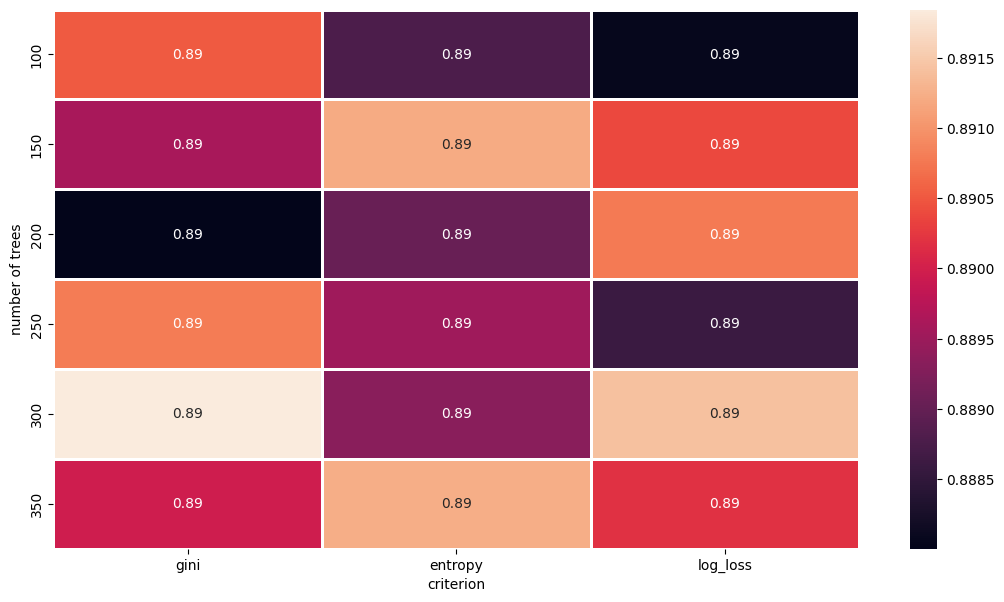

In [24]:
fig2, ax2 = plt.subplots(figsize=(13,7))

ttl2 = ax2.title
ttl2.set_position([0.5,1.05])


y_axis_labels_rf = [100, 150, 200, 250, 300, 350] # labels for x-axis
x_axis_labels_rf = ["gini", "entropy", "log_loss"] # labels for y-axis

heat_map2 = sns.heatmap(performance_rf_intersection_normal_covid, linewidth = 1 , annot = True, xticklabels=x_axis_labels_rf, yticklabels=y_axis_labels_rf)

plt.xlabel('criterion')
plt.ylabel('number of trees')
plt.show()

### Load training and testing data and use the union of genes from top 100 DEGs of normal vs COVID and mild vs severe

In [14]:
top_gene2=[]

with open ("union_mild_severe_and_normal_rest_new.txt") as f2:
    lines2=f2.readlines()
    for line2 in lines2:
        line2=line2.strip()
        top_gene2.append(line2)

index2 = X_train.columns.get_indexer(top_gene2) 
X_train_new2 = X_train.iloc[:, index2] # retain only the top n features in the data
X_test_new2 = X_test.iloc[:, index2] # retain only the top n features in the data

### Cell-level classification of normal and COVID using SVM

In [15]:
temp2=[]

C=[1, 0.9, 0.8, 0.7, 0.6, 0.5]
kernel=['linear', 'poly', 'rbf', 'sigmoid']
performance_svm_union_normal_covid=[]

for temp_i5 in range(0, len(kernel)):
    for temp_i6 in range(0, len(C)):
        print(temp_i5)
        print(temp_i6)
        clf_select2 = SVC(kernel=kernel[temp_i5], class_weight='balanced', C=C[temp_i6])
        clf_select2.fit(X_train_new2, y_train)  # train the model using cross validation training set (9 patients)

        test_pred2 = clf_select2.predict(X_test_new2)  # predict using cross validation testing set 
        f1_select2 = f1_score(y_test, test_pred2, average='weighted')
        
        temp2.append(f1_select2)
    performance_svm_union_normal_covid.append(temp2)
    temp2=[]

print(performance_svm_union_normal_covid)

0
0
0
1
0
2
0
3
0
4
0
5
1
0
1
1
1
2
1
3
1
4
1
5
2
0
2
1
2
2
2
3
2
4
2
5
3
0
3
1
3
2
3
3
3
4
3
5
[[0.7926619986468684, 0.7914532468852374, 0.79127944557786, 0.7905894602739851, 0.7898994749701103, 0.7899020918068931], [0.8607376369492102, 0.859641053825055, 0.858332081114136, 0.8559494004606951, 0.8544506958374828, 0.8496066532156036], [0.8989698124645558, 0.8958332879523239, 0.8930493709258452, 0.8918183856865842, 0.8877815472088375, 0.8835844026880136], [0.555278413516024, 0.555278413516024, 0.5566552987244939, 0.5564824102726668, 0.557170120739639, 0.5583754001426231]]


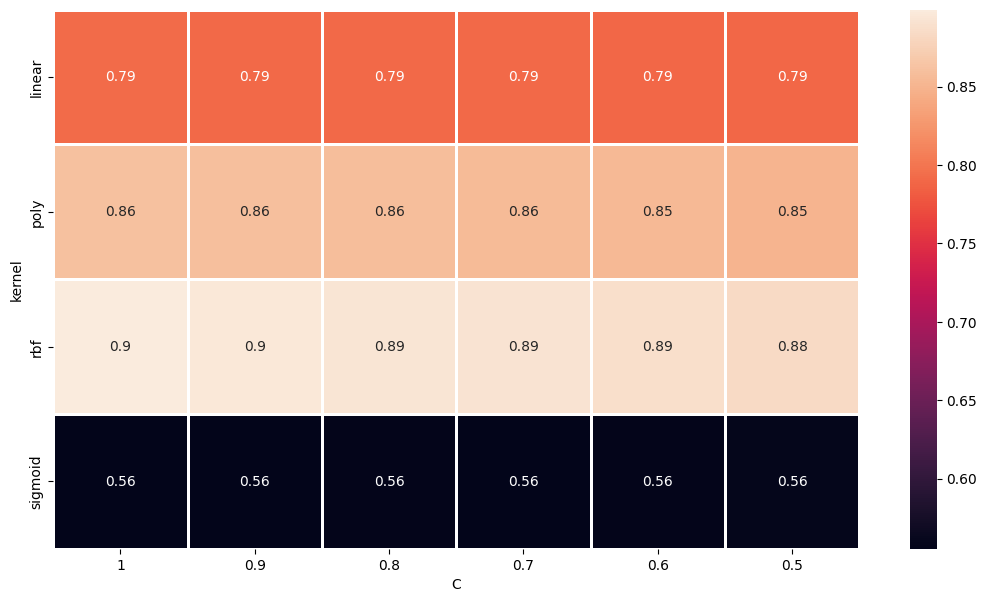

In [16]:
fig3, ax3 = plt.subplots(figsize=(13,7))

# Set the font size and the distance of the title from the plot
ttl3 = ax3.title
ttl3.set_position([0.5,1.05])


x_axis_labels_svm = [1,0.9,0.8,0.7,0.6,0.5] # labels for x-axis
y_axis_labels_svm = ['linear', 'poly', 'rbf', 'sigmoid'] # labels for y-axis

heat_map3 = sns.heatmap(performance_svm_union_normal_covid, linewidth = 1 , annot = True, xticklabels=x_axis_labels_svm, yticklabels=y_axis_labels_svm)

plt.xlabel('C')
plt.ylabel('kernel')
plt.show()

### Cell-level classification of normal and COVID using random forest

In [18]:
temp_rf2=[]
num_tree=[100, 150, 200, 250, 300, 350]
loss=["gini", "entropy", "log_loss"]

performance_rf_union_normal_covid=[]

for temp_i7 in range(0, len(num_tree)):
    for temp_i8 in range(0, len(loss)):
        print(temp_i7)
        print(temp_i8)
        clf_rf2 = RandomForestClassifier(n_estimators = num_tree[temp_i7], criterion = loss[temp_i8])
        clf_rf2.fit(X_train_new2, y_train)
        test_pred_rf2 = clf_rf2.predict(X_test_new2)
        f1_rf2 = f1_score(y_test, test_pred_rf2, average='weighted')
        temp_rf2.append(f1_rf2)
    performance_rf_union_normal_covid.append(temp_rf2)
    temp_rf2=[]

print(performance_rf_union_normal_covid)

0
0
0
1
0
2
1
0
1
1
1
2
2
0
2
1
2
2
3
0
3
1
3
2
4
0
4
1
4
2
5
0
5
1
5
2
[[0.9509062803403485, 0.9484482114397903, 0.9467140776433373], [0.9524579415479737, 0.9448054854747097, 0.9458347837388849], [0.9528069842383905, 0.9448054854747097, 0.9449706594819437], [0.9536689127877314, 0.9458414358606135, 0.9463637775557052], [0.9534935888145475, 0.9451493136351902, 0.945497579700732], [0.9519316099960097, 0.9453234518344641, 0.9453256571212997]]


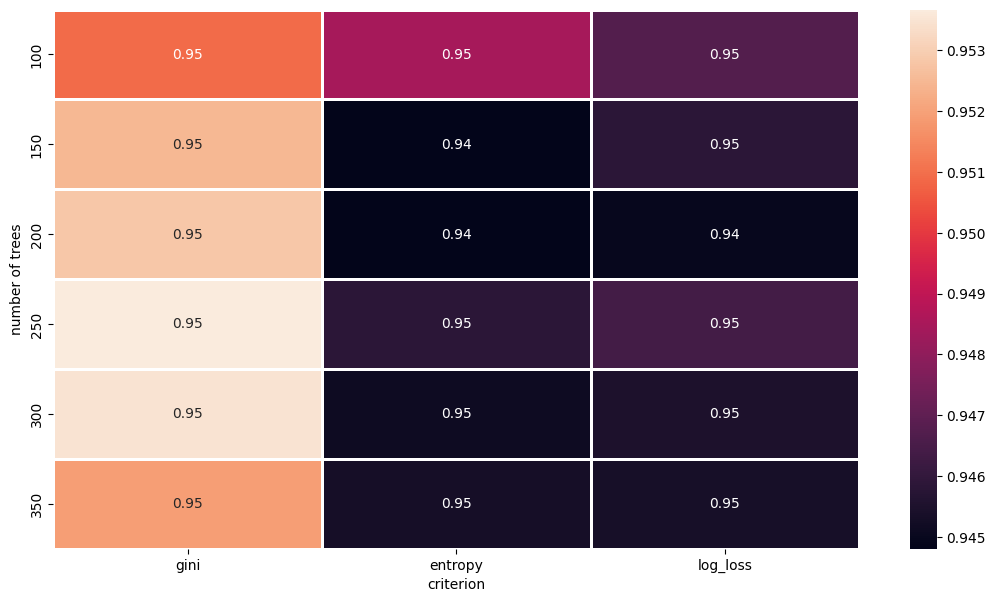

In [20]:
fig4, ax4 = plt.subplots(figsize=(13,7))

ttl4 = ax4.title
ttl4.set_position([0.5,1.05])


y_axis_labels_rf = [100, 150, 200, 250, 300, 350] # labels for x-axis
x_axis_labels_rf = ["gini", "entropy", "log_loss"] # labels for y-axis

heat_map4 = sns.heatmap(performance_rf_union_normal_covid, linewidth = 1 , annot = True, xticklabels=x_axis_labels_rf, yticklabels=y_axis_labels_rf)

plt.xlabel('criterion')
plt.ylabel('number of trees')
plt.show()

### Load cross validation and testing data for mild vs severe using the intersection of genes from top 100 DEGs of normal vs COVID and mild vs severe

In [44]:
X_test2 = pd.read_csv('mild_vs_severe_test_data.csv')
y_test2 = pd.read_csv('mild_vs_severe_test_label.csv')
y_test2 = np.array(y_test2.drop(columns=['Unnamed: 0']))

X_train2 = pd.read_csv('mild_vs_severe_training_data.csv')
y_train2 = pd.read_csv('mild_vs_severe_training_label.csv')
y_train2 = np.array(y_train2.drop(columns=['Unnamed: 0']))

X_train_new3 = X_train2.iloc[:, index]
X_test_new3 = X_test2.iloc[:, index] # retain only the top n features in the data

### Cell-level classification of mild and severe using SVM

In [34]:
temp3=[]

C=[1, 0.9, 0.8, 0.7, 0.6, 0.5]
kernel=['linear', 'poly', 'rbf', 'sigmoid']
performance_svm_intersection_mild_severe=[]

for temp_i9 in range(0, len(kernel)):
    for temp_i10 in range(0, len(C)):
        print(temp_i9)
        print(temp_i10)
        clf_select3 = SVC(kernel=kernel[temp_i9], class_weight='balanced', C=C[temp_i10])
        clf_select3.fit(X_train_new3, y_train2)  # train the model using cross validation training set (9 patients)

        test_pred3 = clf_select3.predict(X_test_new3)  # predict using cross validation testing set 
        f1_select3 = f1_score(y_test2, test_pred3, average='weighted')
        
        temp3.append(f1_select3)
    performance_svm_intersection_mild_severe.append(temp3)
    temp3=[]

print(performance_svm_intersection_mild_severe)

0
0
0
1
0
2
0
3
0
4
0
5
1
0
1
1
1
2
1
3
1
4
1
5
2
0
2
1
2
2
2
3
2
4
2
5
3
0
3
1
3
2
3
3
3
4
3
5
[[0.8076779047292231, 0.8071536042830226, 0.8063741243401262, 0.8061121403226191, 0.8056583170363928, 0.8050068911581584], [0.9035524501137415, 0.9018541141348877, 0.8967448304656348, 0.8936943712244093, 0.8899496857172604, 0.8828269298133438], [0.9438654781942429, 0.9435185208868462, 0.9421483288771147, 0.9407457937452761, 0.9397416669844836, 0.9394128572055215], [0.48399054483724024, 0.48292835488913616, 0.48395012768136103, 0.4839075565520302, 0.4846172056973221, 0.48497180734515033]]


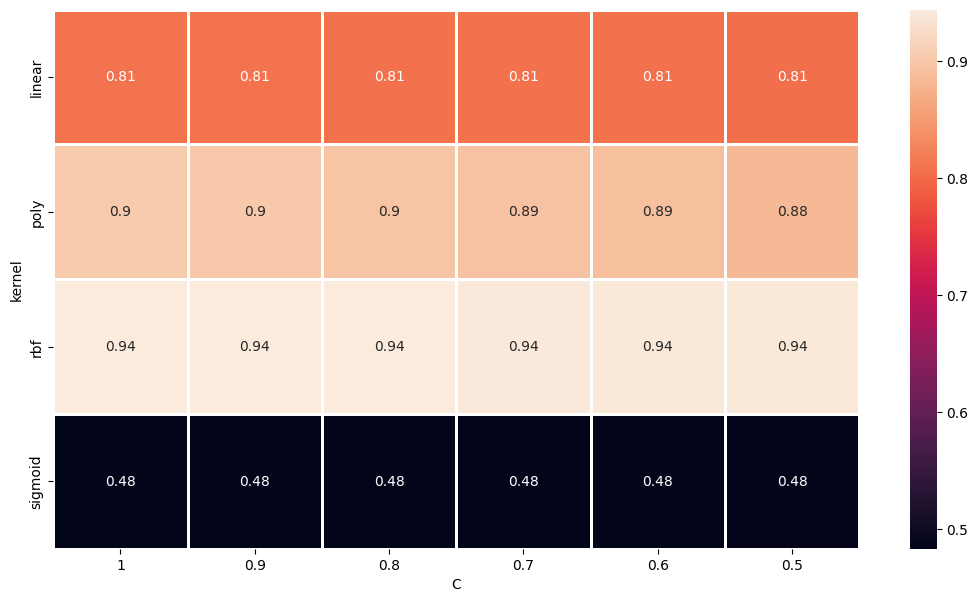

In [35]:
fig5, ax5 = plt.subplots(figsize=(13,7))

# Set the font size and the distance of the title from the plot
ttl5 = ax5.title
ttl5.set_position([0.5,1.05])


x_axis_labels_svm = [1,0.9,0.8,0.7,0.6,0.5] # labels for x-axis
y_axis_labels_svm = ['linear', 'poly', 'rbf', 'sigmoid'] # labels for y-axis

heat_map5 = sns.heatmap(performance_svm_intersection_mild_severe, linewidth = 1 , annot = True, xticklabels=x_axis_labels_svm, yticklabels=y_axis_labels_svm)

plt.xlabel('C')
plt.ylabel('kernel')
plt.show()

### Cell-level classification of mild and severe using random forest

In [46]:
temp_rf3=[]
num_tree=[100, 150, 200, 250, 300, 350]
loss=["gini", "entropy", "log_loss"]

performance_rf_intersection_mild_severe=[]

for temp_i11 in range(0, len(num_tree)):
    for temp_i12 in range(0, len(loss)):
        print(temp_i11)
        print(temp_i12)
        clf_rf3 = RandomForestClassifier(n_estimators = num_tree[temp_i11], criterion = loss[temp_i12])
        clf_rf3.fit(X_train_new3, y_train2)
        test_pred_rf3 = clf_rf3.predict(X_test_new3)
        f1_rf3 = f1_score(y_test2, test_pred_rf3, average='weighted')
        temp_rf3.append(f1_rf3)
    performance_rf_intersection_mild_severe.append(temp_rf3)
    temp_rf3=[]

print(performance_rf_intersection_mild_severe)

0
0
0
1
0
2
1
0
1
1
1
2
2
0
2
1
2
2
3
0
3
1
3
2
4
0
4
1
4
2
5
0
5
1
5
2
[[0.9971305111081251, 0.9953362843561876, 0.9953394573069397], [0.9971305111081251, 0.9956972310984603, 0.9956957666621875], [0.9974887684994856, 0.9960537790706203, 0.9964155735582517], [0.99784861554923, 0.9956957666621875, 0.9964131388851563], [0.9971305111081251, 0.9953362843561876, 0.9964131388851563], [0.997489624877321, 0.9964131388851563, 0.9960537790706203]]


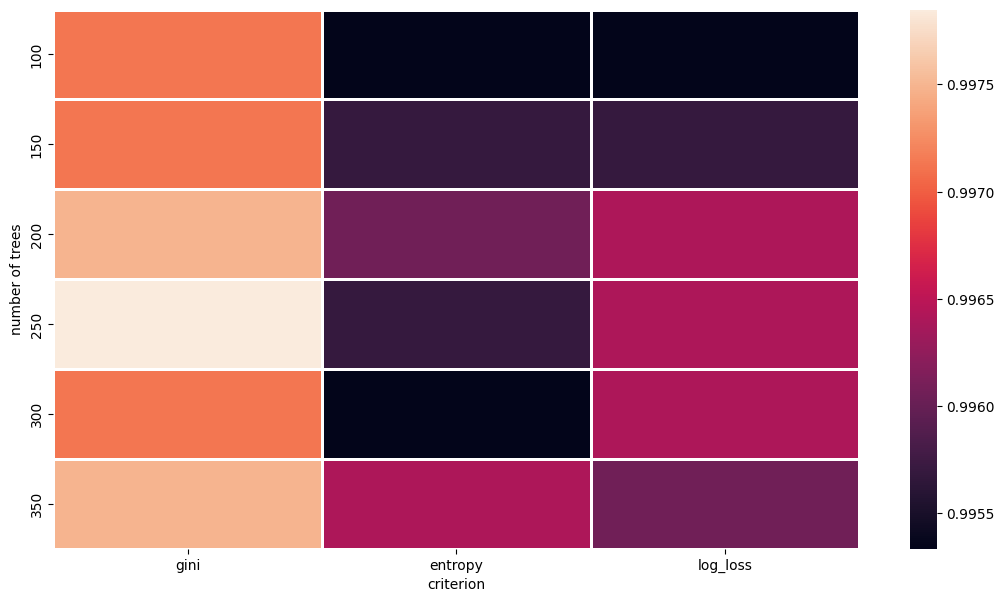

In [48]:
fig6, ax6 = plt.subplots(figsize=(13,7))

ttl6 = ax6.title
ttl6.set_position([0.5,1.05])


y_axis_labels_rf = [100, 150, 200, 250, 300, 350] # labels for x-axis
x_axis_labels_rf = ["gini", "entropy", "log_loss"] # labels for y-axis

heat_map6 = sns.heatmap(performance_rf_intersection_mild_severe, linewidth = 1 , annot = False, xticklabels=x_axis_labels_rf, yticklabels=y_axis_labels_rf)

plt.xlabel('criterion')
plt.ylabel('number of trees')
plt.show()

### Load cross validation and testing data for mild vs severe using the union of genes from top 100 DEGs of normal vs COVID and mild vs severe

In [39]:
X_train_new4 = X_train2.iloc[:, index2] # retain only the top n features in the data
X_test_new4 = X_test2.iloc[:, index2] # retain only the top n features in the data

### Cell-level classification of mild and severe using SVM

In [40]:
temp4=[]

C=[1, 0.9, 0.8, 0.7, 0.6, 0.5]
kernel=['linear', 'poly', 'rbf', 'sigmoid']
performance_svm_union_mild_severe=[]

for temp_i13 in range(0, len(kernel)):
    for temp_i14 in range(0, len(C)):
        print(temp_i13)
        print(temp_i14)
        clf_select4 = SVC(kernel=kernel[temp_i13], class_weight='balanced', C=C[temp_i14])
        clf_select4.fit(X_train_new4, y_train2)  # train the model using cross validation training set (9 patients)

        test_pred4 = clf_select4.predict(X_test_new4)  # predict using cross validation testing set 
        f1_select4 = f1_score(y_test2, test_pred4, average='weighted')
        
        temp4.append(f1_select4)
    performance_svm_union_mild_severe.append(temp4)
    temp4=[]

print(performance_svm_union_mild_severe)

0
0
0
1
0
2
0
3
0
4
0
5
1
0
1
1
1
2
1
3
1
4
1
5
2
0
2
1
2
2
2
3
2
4
2
5
3
0
3
1
3
2
3
3
3
4
3
5
[[0.8476689052689045, 0.8477501001348219, 0.8484565961898808, 0.8475370630924601, 0.8469497199841619, 0.8456953702051282], [0.8885500297377921, 0.8865354880194143, 0.8817971396139596, 0.8743393654981694, 0.8655024511067336, 0.8553469068648469], [0.9596618066048742, 0.9582471759749418, 0.9575468801026688, 0.9561198844758677, 0.9561336920596072, 0.955112714327197], [0.5289867586909774, 0.5303619798334855, 0.5293340188052195, 0.5293194488074805, 0.5320699560460049, 0.5338129764843207]]


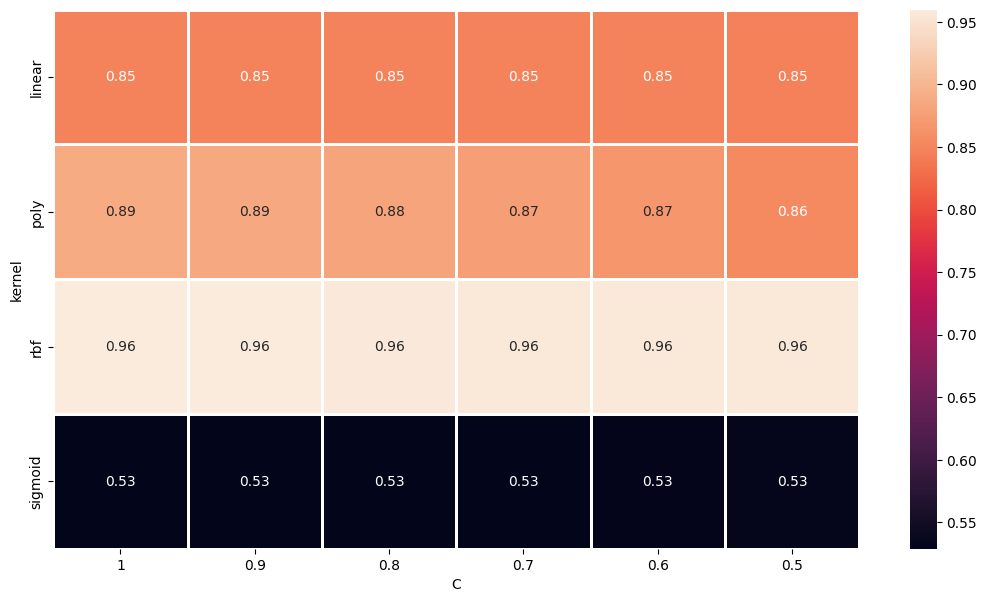

In [41]:
fig7, ax7 = plt.subplots(figsize=(13,7))

# Set the font size and the distance of the title from the plot
ttl7 = ax7.title
ttl7.set_position([0.5,1.05])


x_axis_labels_svm = [1,0.9,0.8,0.7,0.6,0.5] # labels for x-axis
y_axis_labels_svm = ['linear', 'poly', 'rbf', 'sigmoid'] # labels for y-axis

heat_map7 = sns.heatmap(performance_svm_union_mild_severe, linewidth = 1 , annot = True, xticklabels=x_axis_labels_svm, yticklabels=y_axis_labels_svm)

plt.xlabel('C')
plt.ylabel('kernel')
plt.show()

### Cell-level classification of mild and severe using random forest

In [52]:
temp_rf4=[]
num_tree=[100, 150, 200, 250, 300, 350]
loss=["gini", "entropy", "log_loss"]

performance_rf_union_mild_severe=[]

for temp_i15 in range(0, len(num_tree)):
    for temp_i16 in range(0, len(loss)):
        print(temp_i15)
        print(temp_i16)
        clf_rf4 = RandomForestClassifier(n_estimators = num_tree[temp_i15], criterion = loss[temp_i16])
        clf_rf4.fit(X_train_new4, y_train2)
        test_pred_rf4 = clf_rf4.predict(X_test_new4)
        f1_rf4 = f1_score(y_test2, test_pred_rf4, average='weighted')
        temp_rf4.append(f1_rf4)
    performance_rf_union_mild_severe.append(temp_rf4)
    temp_rf4=[]

print(performance_rf_union_mild_severe)

0
0
0
1
0
2
1
0
1
1
1
2
2
0
2
1
2
2
3
0
3
1
3
2
4
0
4
1
4
2
5
0
5
1
5
2
[[0.9985657436994868, 0.9989241249474232, 0.9992826277770313], [0.9985657436994868, 0.9985657436994868, 0.9985657436994868], [0.9992826277770313, 0.9985657436994868, 0.9985657436994868], [0.9989241249474232, 0.9985657436994868, 0.9985657436994868], [0.9989241249474232, 0.9985657436994868, 0.9985657436994868], [0.9989241249474232, 0.9992826277770313, 0.9989241249474232]]


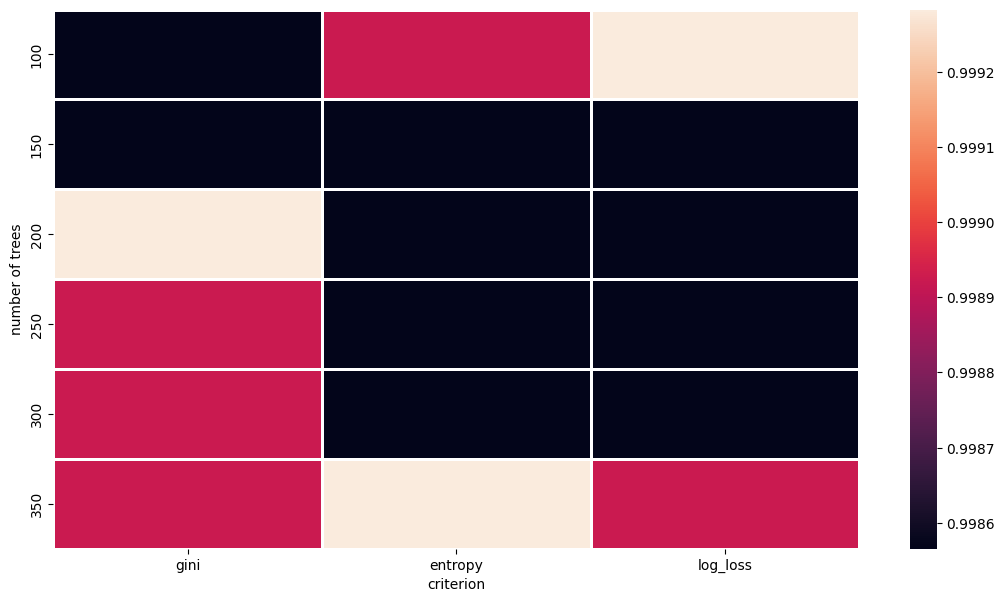

In [54]:
fig8, ax8 = plt.subplots(figsize=(13,7))

ttl8 = ax8.title
ttl8.set_position([0.5,1.05])


y_axis_labels_rf = [100, 150, 200, 250, 300, 350] # labels for x-axis
x_axis_labels_rf = ["gini", "entropy", "log_loss"] # labels for y-axis

heat_map8 = sns.heatmap(performance_rf_union_mild_severe, linewidth = 1 , annot = False, xticklabels=x_axis_labels_rf, yticklabels=y_axis_labels_rf)

plt.xlabel('criterion')
plt.ylabel('number of trees')
plt.show()